In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df.shape

(20800, 5)

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df.fillna('',inplace=True)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
x = df['text']

y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [14]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [15]:
tfid_train = tfidf.fit_transform(X_train)

print(tfid_train)

  (0, 60321)	0.10645059247015695
  (0, 128088)	0.04259028854569864
  (0, 55667)	0.10610295901486237
  (0, 60318)	0.09484749008749904
  (0, 47747)	0.0461958616014772
  (0, 64002)	0.07861782570021632
  (0, 74600)	0.04959989416994947
  (0, 5139)	0.09674895727036216
  (0, 55893)	0.059334964282056216
  (0, 44419)	0.08084292788797674
  (0, 118098)	0.03661775517778563
  (0, 32920)	0.06437804701788366
  (0, 137052)	0.06961917477002283
  (0, 127294)	0.034148205743814664
  (0, 98440)	0.055846027040372295
  (0, 96878)	0.052283646820006996
  (0, 135866)	0.07186792563818366
  (0, 117389)	0.07111619363203678
  (0, 120730)	0.054835051698152115
  (0, 124922)	0.04204653694333571
  (0, 138349)	0.04475537031031903
  (0, 85846)	0.02926139714718181
  (0, 104546)	0.04849565402652578
  (0, 11401)	0.0658083266706999
  (0, 88337)	0.147323804762778
  :	:
  (16639, 71561)	0.01876210646607924
  (16639, 1272)	0.05289830970812519
  (16639, 130846)	0.01554626063517121
  (16639, 91137)	0.05432113773420402
  (16639, 7

In [16]:
pac = PassiveAggressiveClassifier(max_iter=50)

In [17]:
tfid_test = tfidf.transform(X_test)

In [18]:
pac.fit(tfid_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [19]:
y_pred = pac.predict(tfid_test)

In [20]:
accuracy_score(y_test, y_pred)

0.965625

In [21]:
con = confusion_matrix(y_test, y_pred)
con

array([[1984,   76],
       [  67, 2033]], dtype=int64)

Text(33.0, 0.5, 'Truth Value')

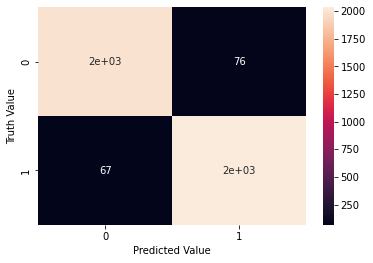

In [29]:
sns.heatmap(con, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')